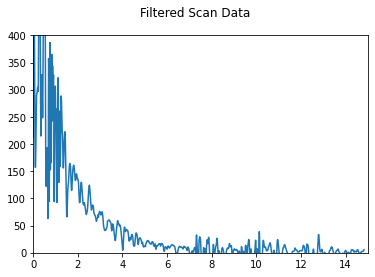

[[212.11356673 482.53563724 560.5739656  ...   4.41608075   5.44218734
    5.57921993]]


In [1]:
#pip install git+https://github.com/ozgur/python-firebase
from firebase import  firebase
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.fft import fftshift
import os
import glob
from flask import Flask,render_template
import ipywidgets as widgets
import json


#retrieve json file from firebase
firebase = firebase.FirebaseApplication('https://tribirth-f4422-default-rtdb.firebaseio.com/',None)
result = firebase.get("0","")
#print(result)

jtopy=json.dumps(result) #json.dumps take a dictionary as input and returns a string as output.
dict_json=json.loads(jtopy) # json.loads take a string as input and returns a dictionary as output.

# print(dict_json["FIELD1"])


def Data_Preprocess(x):
 sig = [np.array(x)]
 # print(sig)
 return sig

def Apply_Filter(sig):
    sos = signal.butter(1, [0.1, 20], 'band', fs=100, output='sos')
    filtered = signal.sosfilt(sos, sig)
    #print (filtered)
    return filtered


def Plot_Graph(filtered):
   t = np.linspace(0, 15,1500, False)
   t = t[:filtered.size]
   plt.plot(t.squeeze(), filtered.squeeze())
   plt.suptitle('Filtered Scan Data')
   plt.axis([0, 15, 0, 400])
   plt.show()
   #plt.savefig("output.jpg")

Data = Data_Preprocess(dict_json["FIELD1"])
Filtered_data = Apply_Filter(Data)
Plot_Graph(Filtered_data)
print(Filtered_data)
